## 《合成孔径雷达成像——算法与实现》中5.4.2 多普勒中心

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体 
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 

In [3]:
from numpy.fft import fft,fftshift,ifft,ifftshift
from numpy import kaiser,sinc,conj,fliplr,log10,abs,max,min
from matplotlib.pyplot import figure,subplot,plot,axis,title,suptitle,xlabel,ylabel,text,arrow,axvline,tight_layout

Ta = 64;                      # 脉冲持续时间
Ka = -1.56e-2                 # 方位向调频率
# 参数计算
Delta_f_dop = abs(Ka*Ta);      # 方位信号带宽
# 参数设置
ratio = 1;           # 方位过采样率
Fa = ratio*Delta_f_dop; # 方位采样频率PRF
N = int(2*np.ceil(Fa*Ta/2));         # 方位采样点数
dt = Ta/N;                   # 采样时间间隔
df = Fa/N;                  # 采样频率间隔
# 变量设置
t1 = np.arange(-Ta/2,Ta/2,dt);       # 时间变量
t2 = np.arange(-3*Ta/4,Ta/4,dt);       # 时间变量
f1 = np.arange(-Fa/2,Fa/2,df);     # 频率变量
f2 = np.arange(-3*Fa/4,Fa/4,df);     # 频率变量
n = np.arange(0,N,1)
# 信号表达
st1 = np.exp(1j*np.pi*Ka*t1**2);     # Chirp信号复数表达式
st2 = np.exp(1j*np.pi*Ka*t2**2);     # Chirp信号复数表达式
omega_a = sinc(1.5*t1/Ta)**2;    # 双程天线波束方向图
st1  = omega_a*st1;            # 天线方向图调制的方位Chirp信号
st2  = omega_a*st2;            # 天线方向图调制的方位Chirp信号
omega_a_nor = abs(omega_a)/max(abs(omega_a));       # 归一化
omega_a_log = 20*log10(omega_a_nor);                # 对数化
Sf1 = fft(st1)
Sf2 = fft(st2)

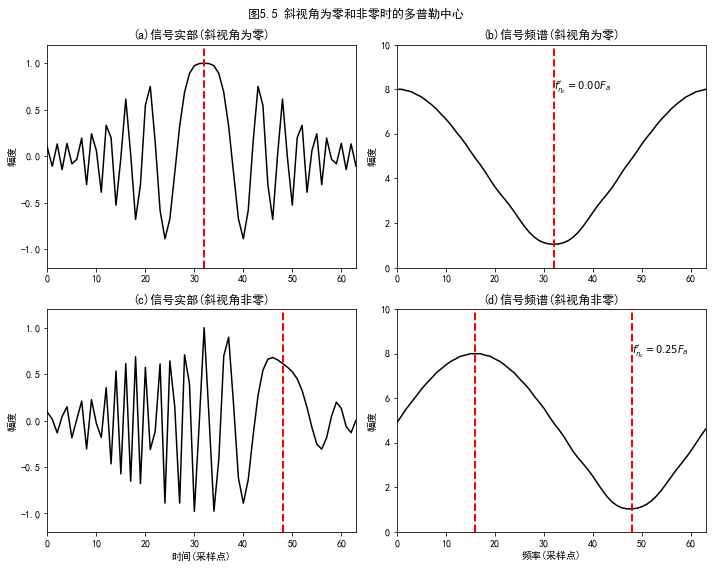

In [5]:
# 绘图
figure(figsize=(10,8));

subplot(221),
plot(n,np.real(st1),'k')
axis([0,N-1,-1.2,1.2])
title('(a)信号实部(斜视角为零)');ylabel('幅度')
axvline(x=32, c="r", ls="--", lw=2)

subplot(222);
plot(n,abs(Sf1),'k')
axis([0,N-1,0,10])
title('(b)信号频谱(斜视角为零)');ylabel('幅度')
axvline(x=32, c="r", ls="--", lw=2)
text(32,8,'$f_{\eta_c}^{\prime}=0.00F_a$')
subplot(223)
plot(n,np.real(st2),'k')
axis([0,N-1,-1.2,1.2])
title('(c)信号实部(斜视角非零)');xlabel('时间(采样点)');ylabel('幅度')
axvline(x=48, c="r", ls="--", lw=2)
subplot(224)
plot(n,abs(Sf2),'k')
axis([0,N-1,0,10])
title('(d)信号频谱(斜视角非零)');xlabel('频率(采样点)');ylabel('幅度')
axvline(x=48, c="r", ls="--", lw=2)
axvline(x=16, c="r", ls="--", lw=2)
text(48,8,'$f_{\eta_c}^{\prime}=0.25F_a$')
suptitle('图5.5 斜视角为零和非零时的多普勒中心')
tight_layout()

本文Python代码参照Matlab代码自：https://github.com/wanghs008/SAR-SignalProcessing